In [1]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_merge = pd.read_csv("C:\\Users\\asus\\BigContest\\files\\data_preprocessing\\ver_1_merge_data.csv")
data_merge

,base_date,emd_cd,korean,long_term_frgn,short_term_frgn,resident,card_cnt,card_amt,waste_cnt,waste_amt
0,2019-11-30,50110250,7.321788e+06,469689.3527,129161.4006,25149,267.380645,9586590.265,620,2279550
1,2019-12-31,50110250,6.915173e+06,482920.2385,122124.6609,25080,266.814465,9621756.255,8178,31493650
2,2020-01-31,50110250,7.476137e+06,587299.9640,112758.3034,25076,257.604430,9648302.136,13042,49632850
3,2020-02-29,50110250,5.561978e+06,559439.3959,60252.7989,25021,249.621160,8760701.457,12264,46197050
4,2020-03-31,50110250,6.094369e+06,714445.0812,29661.4429,24942,261.877023,8979547.945,14316,52561750
...,...,...,...,...,...,...,...,...,...,...
1629,2021-02-28,50130620,4.321265e+06,109325.4866,280.6159,4173,65.216000,2463788.712,4563,15566250
1630,2021-03-31,50130620,4.744309e+06,118258.8891,1475.8404,4178,67.700000,2572585.700,4920,17300600
1631,2021-04-30,50130620,5.236706e+06,129227.7480,1283.0997,4161,68.642336,2473174.901,5256,17646850
1632,2021-05-31,50130620,5.805413e+06,144213.2650,1212.2652,4178,69.333333,2864493.949,6346,19494750


xgboost 모델링

In [3]:
X_features = data_merge.loc[:, ['korean', 'long_term_frgn', 'short_term_frgn', 'resident', 'card_cnt', 'card_amt', 'waste_cnt']]
y_label = data_merge.loc[:, 'waste_amt']

In [4]:
# 전체 데이터셋을 학습용 80%, 테스트용 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(1307, 7) (327, 7)


In [5]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [14]:
# max_depth = 3, 학습률은 0.1, 목적함수(objective)는 reg:linear(회귀)
# 오류함수의 평가성능지표는 rmse
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 7,
         'eta' : 0.1, 
         'objective' : 'reg:linear',
         'eval_metric' : 'rmsle',
         'early_stoppings' : 100 }
num_rounds = 1000

In [15]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[23:50:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[23:50:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stoppings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmsle:2.31350	eval-rmsle:2.31652
[1]	train-rmsle:1.67178	eval-rmsle:1.67360
[2]	train-rmsle:1.31567	eval-rmsle:1.31465
[3]	train-rmsle:1.07783	eval-rmsle:1.07869
[4]	train-rmsle:0.90266	eval-rmsle:0.90313
[5]	train-rmsle:0.76876	eval-rmsle:0.77086
[6]	train-rmsle:0.66169	eval-rmsle:0.66422
[7]	train-rmsle:0.57491	eval-rmsle:0.57896
[8]	train-rmsle:0.50256	eval-rmsle:0.50764
[9]	train-rmsle:0.44178	eval-rmsle:0.4476

[172]	train-rmsle:0.02679	eval-rmsle:0.09887
[173]	train-rmsle:0.02664	eval-rmsle:0.09888
[174]	train-rmsle:0.02660	eval-rmsle:0.09900
[175]	train-rmsle:0.02650	eval-rmsle:0.09900
[176]	train-rmsle:0.02646	eval-rmsle:0.09902
[177]	train-rmsle:0.02644	eval-rmsle:0.09903
[178]	train-rmsle:0.02636	eval-rmsle:0.09907
[179]	train-rmsle:0.02627	eval-rmsle:0.09913
[180]	train-rmsle:0.02605	eval-rmsle:0.09913
[181]	train-rmsle:0.02604	eval-rmsle:0.09918
[182]	train-rmsle:0.02601	eval-rmsle:0.09916
[183]	train-rmsle:0.02589	eval-rmsle:0.09916
[184]	train-rmsle:0.02566	eval-rmsle:0.09922
[185]	train-rmsle:0.02561	eval-rmsle:0.09918
[186]	train-rmsle:0.02553	eval-rmsle:0.09919
[187]	train-rmsle:0.02544	eval-rmsle:0.09919
[188]	train-rmsle:0.02533	eval-rmsle:0.09917
[189]	train-rmsle:0.02531	eval-rmsle:0.09914
[190]	train-rmsle:0.02519	eval-rmsle:0.09908
[191]	train-rmsle:0.02508	eval-rmsle:0.09915
[192]	train-rmsle:0.02508	eval-rmsle:0.09917
[193]	train-rmsle:0.02496	eval-rmsle:0.09916
[194]	trai

[355]	train-rmsle:0.01038	eval-rmsle:0.09860
[356]	train-rmsle:0.01038	eval-rmsle:0.09860
[357]	train-rmsle:0.01034	eval-rmsle:0.09860
[358]	train-rmsle:0.01029	eval-rmsle:0.09861
[359]	train-rmsle:0.01029	eval-rmsle:0.09862
[360]	train-rmsle:0.01026	eval-rmsle:0.09862
[361]	train-rmsle:0.01018	eval-rmsle:0.09867
[362]	train-rmsle:0.01015	eval-rmsle:0.09865
[363]	train-rmsle:0.01007	eval-rmsle:0.09869
[364]	train-rmsle:0.01007	eval-rmsle:0.09872
[365]	train-rmsle:0.01003	eval-rmsle:0.09876
[366]	train-rmsle:0.01002	eval-rmsle:0.09876
[367]	train-rmsle:0.01002	eval-rmsle:0.09876
[368]	train-rmsle:0.01001	eval-rmsle:0.09879
[369]	train-rmsle:0.01001	eval-rmsle:0.09879
[370]	train-rmsle:0.01001	eval-rmsle:0.09879
[371]	train-rmsle:0.00973	eval-rmsle:0.09872
[372]	train-rmsle:0.00968	eval-rmsle:0.09877
[373]	train-rmsle:0.00963	eval-rmsle:0.09875
[374]	train-rmsle:0.00962	eval-rmsle:0.09876
[375]	train-rmsle:0.00937	eval-rmsle:0.09874
[376]	train-rmsle:0.00932	eval-rmsle:0.09874
[377]	trai

[538]	train-rmsle:0.00420	eval-rmsle:0.09871
[539]	train-rmsle:0.00420	eval-rmsle:0.09870
[540]	train-rmsle:0.00419	eval-rmsle:0.09870
[541]	train-rmsle:0.00418	eval-rmsle:0.09870
[542]	train-rmsle:0.00409	eval-rmsle:0.09871
[543]	train-rmsle:0.00407	eval-rmsle:0.09870
[544]	train-rmsle:0.00404	eval-rmsle:0.09870
[545]	train-rmsle:0.00402	eval-rmsle:0.09871
[546]	train-rmsle:0.00402	eval-rmsle:0.09871
[547]	train-rmsle:0.00402	eval-rmsle:0.09871
[548]	train-rmsle:0.00389	eval-rmsle:0.09871
[549]	train-rmsle:0.00388	eval-rmsle:0.09870
[550]	train-rmsle:0.00385	eval-rmsle:0.09870
[551]	train-rmsle:0.00384	eval-rmsle:0.09870
[552]	train-rmsle:0.00383	eval-rmsle:0.09870
[553]	train-rmsle:0.00383	eval-rmsle:0.09870
[554]	train-rmsle:0.00380	eval-rmsle:0.09870
[555]	train-rmsle:0.00379	eval-rmsle:0.09871
[556]	train-rmsle:0.00378	eval-rmsle:0.09871
[557]	train-rmsle:0.00377	eval-rmsle:0.09871
[558]	train-rmsle:0.00376	eval-rmsle:0.09871
[559]	train-rmsle:0.00376	eval-rmsle:0.09871
[560]	trai

[721]	train-rmsle:0.00158	eval-rmsle:0.09861
[722]	train-rmsle:0.00157	eval-rmsle:0.09861
[723]	train-rmsle:0.00157	eval-rmsle:0.09861
[724]	train-rmsle:0.00157	eval-rmsle:0.09862
[725]	train-rmsle:0.00156	eval-rmsle:0.09862
[726]	train-rmsle:0.00155	eval-rmsle:0.09862
[727]	train-rmsle:0.00153	eval-rmsle:0.09862
[728]	train-rmsle:0.00153	eval-rmsle:0.09862
[729]	train-rmsle:0.00152	eval-rmsle:0.09862
[730]	train-rmsle:0.00152	eval-rmsle:0.09862
[731]	train-rmsle:0.00152	eval-rmsle:0.09862
[732]	train-rmsle:0.00152	eval-rmsle:0.09862
[733]	train-rmsle:0.00150	eval-rmsle:0.09862
[734]	train-rmsle:0.00150	eval-rmsle:0.09862
[735]	train-rmsle:0.00150	eval-rmsle:0.09862
[736]	train-rmsle:0.00149	eval-rmsle:0.09862
[737]	train-rmsle:0.00148	eval-rmsle:0.09862
[738]	train-rmsle:0.00148	eval-rmsle:0.09862
[739]	train-rmsle:0.00147	eval-rmsle:0.09862
[740]	train-rmsle:0.00144	eval-rmsle:0.09862
[741]	train-rmsle:0.00143	eval-rmsle:0.09862
[742]	train-rmsle:0.00142	eval-rmsle:0.09863
[743]	trai

[904]	train-rmsle:0.00064	eval-rmsle:0.09863
[905]	train-rmsle:0.00064	eval-rmsle:0.09863
[906]	train-rmsle:0.00064	eval-rmsle:0.09863
[907]	train-rmsle:0.00064	eval-rmsle:0.09863
[908]	train-rmsle:0.00064	eval-rmsle:0.09863
[909]	train-rmsle:0.00062	eval-rmsle:0.09863
[910]	train-rmsle:0.00062	eval-rmsle:0.09863
[911]	train-rmsle:0.00060	eval-rmsle:0.09863
[912]	train-rmsle:0.00060	eval-rmsle:0.09863
[913]	train-rmsle:0.00060	eval-rmsle:0.09863
[914]	train-rmsle:0.00059	eval-rmsle:0.09863
[915]	train-rmsle:0.00058	eval-rmsle:0.09863
[916]	train-rmsle:0.00058	eval-rmsle:0.09863
[917]	train-rmsle:0.00058	eval-rmsle:0.09863
[918]	train-rmsle:0.00058	eval-rmsle:0.09863
[919]	train-rmsle:0.00058	eval-rmsle:0.09863
[920]	train-rmsle:0.00058	eval-rmsle:0.09863
[921]	train-rmsle:0.00057	eval-rmsle:0.09863
[922]	train-rmsle:0.00057	eval-rmsle:0.09863
[923]	train-rmsle:0.00057	eval-rmsle:0.09863
[924]	train-rmsle:0.00057	eval-rmsle:0.09863
[925]	train-rmsle:0.00057	eval-rmsle:0.09863
[926]	trai

In [10]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[1.04996930e+07 1.85982096e+08 2.64844140e+07 2.27938848e+08
 4.48859960e+07 3.70580840e+07 6.72134160e+07 3.84086040e+07
 1.03783168e+08 1.00250104e+08]
예측값 10개만 표시:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [12]:
get_clf_eval(y_test, preds)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

feature importance 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

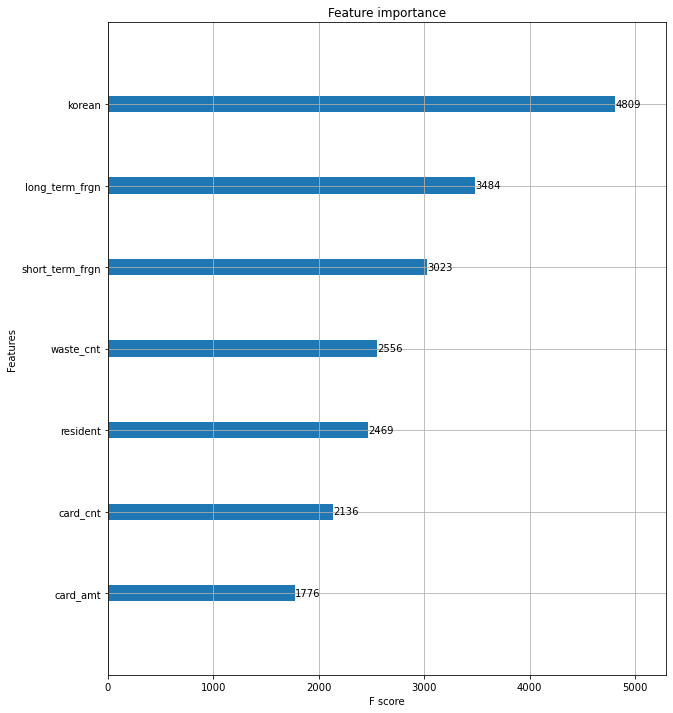

In [13]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)